<a target="_blank" href="https://colab.research.google.com/drive/1sd8WwWrc8Y7QmUh9j_CjlmLc7n7lq8YX?usp=sharing">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## 🕷️ Extract Company Info with `llama-index-tools-scrapegraphai`

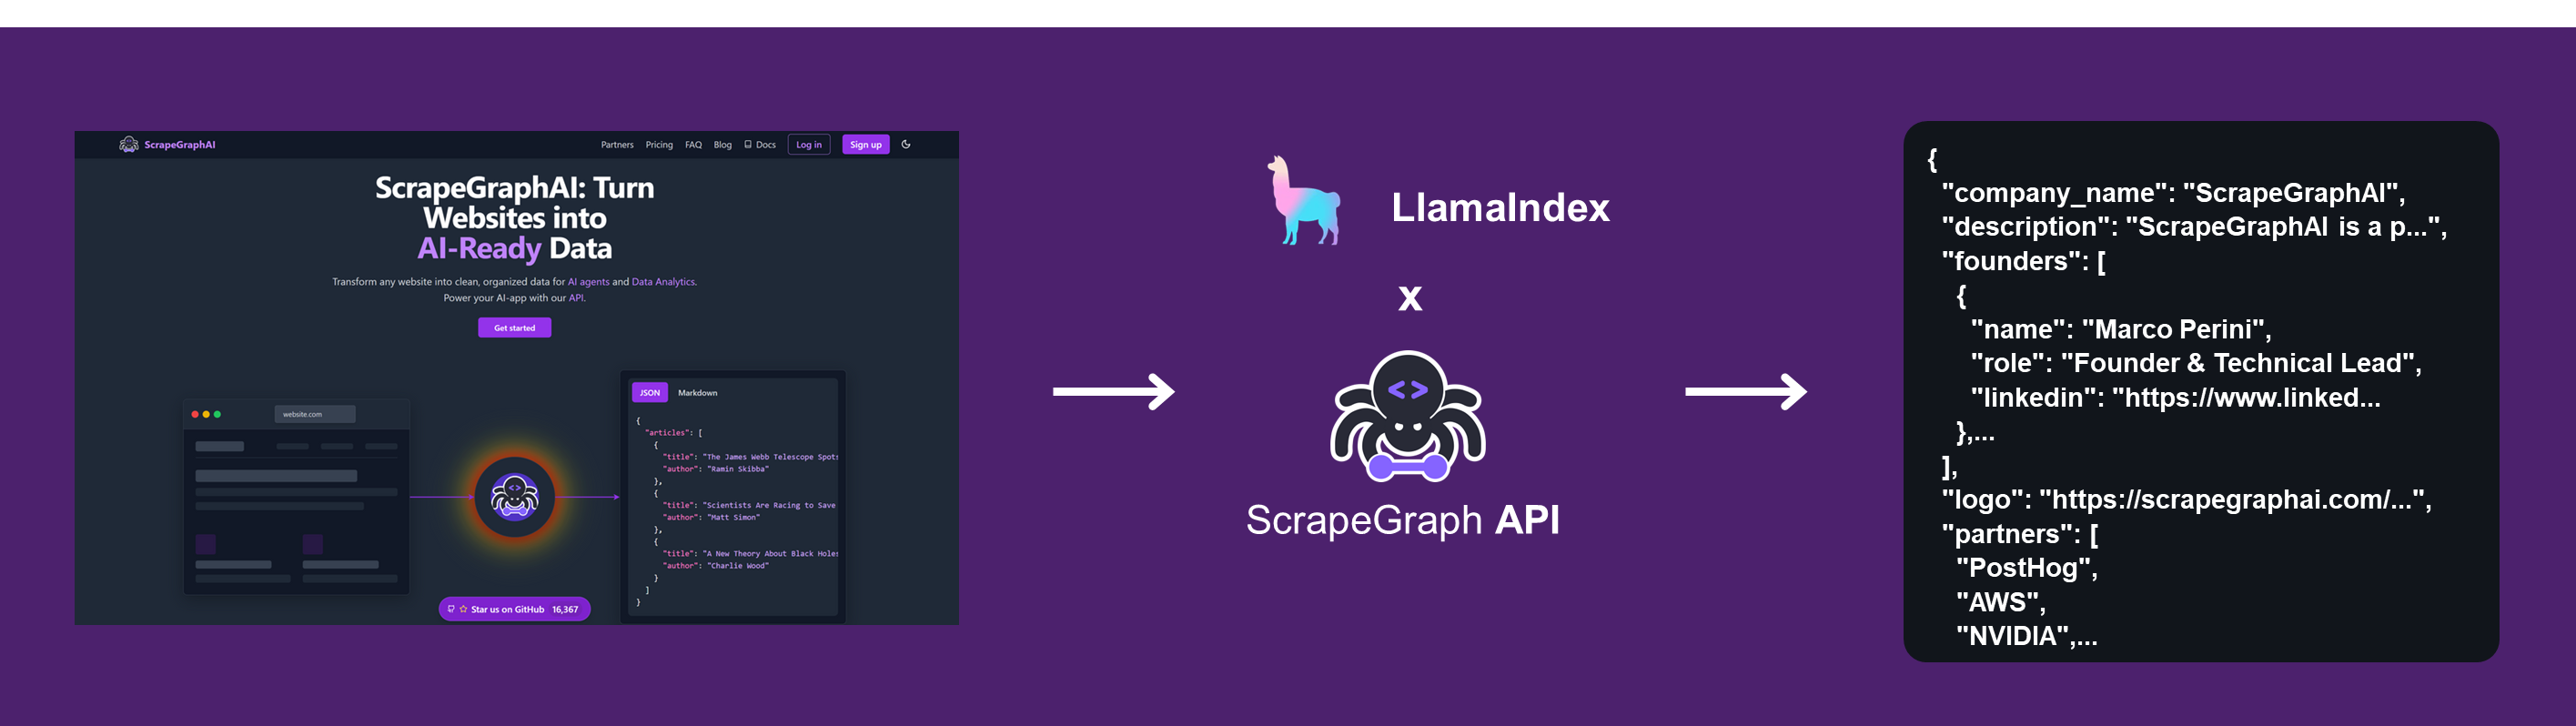

### 🔧 Install `dependencies`

In [ ]:
%%capture
!pip install llama-index-tools-scrapegraphai

### 🔑 Import `ScrapeGraph` API key

You can find the Scrapegraph API key [here](https://dashboard.scrapegraphai.com/)

In [ ]:
import getpass
import os

if not os.environ.get("SGAI_API_KEY"):
    os.environ["SGAI_API_KEY"] = getpass.getpass("Scrapegraph API key:\n")

### 📝 Defining an `Output Schema` for Webpage Content Extraction


If you already know what you want to extract from a webpage, you can **define an output schema** using **Pydantic**. This schema acts as a "blueprint" that tells the AI how to structure the response.

<details>
  <summary>Pydantic Schema Quick Guide</summary>

Types of Schemas  

1. Simple Schema  
Use this when you want to extract straightforward information, such as a single piece of content.  

```python
from pydantic import BaseModel, Field

# Simple schema for a single webpage
class PageInfoSchema(BaseModel):
    title: str = Field(description="The title of the webpage")
    description: str = Field(description="The description of the webpage")

# Example Output JSON after AI extraction
{
    "title": "ScrapeGraphAI: The Best Content Extraction Tool",
    "description": "ScrapeGraphAI provides powerful tools for structured content extraction from websites."
}
```

2. Complex Schema (Nested)  
If you need to extract structured information with multiple related items (like a list of repositories), you can **nest schemas**.

```python
from pydantic import BaseModel, Field
from typing import List

# Define a schema for a single repository
class RepositorySchema(BaseModel):
    name: str = Field(description="Name of the repository (e.g., 'owner/repo')")
    description: str = Field(description="Description of the repository")
    stars: int = Field(description="Star count of the repository")
    forks: int = Field(description="Fork count of the repository")
    today_stars: int = Field(description="Stars gained today")
    language: str = Field(description="Programming language used")

# Define a schema for a list of repositories
class ListRepositoriesSchema(BaseModel):
    repositories: List[RepositorySchema] = Field(description="List of GitHub trending repositories")

# Example Output JSON after AI extraction
{
    "repositories": [
        {
            "name": "google-gemini/cookbook",
            "description": "Examples and guides for using the Gemini API",
            "stars": 8036,
            "forks": 1001,
            "today_stars": 649,
            "language": "Jupyter Notebook"
        },
        {
            "name": "TEN-framework/TEN-Agent",
            "description": "TEN Agent is a conversational AI powered by TEN, integrating Gemini 2.0 Multimodal Live API, OpenAI Realtime API, RTC, and more.",
            "stars": 3224,
            "forks": 311,
            "today_stars": 361,
            "language": "Python"
        }
    ]
}
```

Key Takeaways  
- **Simple Schema**: Perfect for small, straightforward extractions.  
- **Complex Schema**: Use nesting to extract lists or structured data, like "a list of repositories."  

Both approaches give the AI a clear structure to follow, ensuring that the extracted content matches exactly what you need.
</details>


In [ ]:
from pydantic import BaseModel, Field
from typing import List, Dict, Optional

# Schema for founder information
class FounderSchema(BaseModel):
    name: str = Field(description="Name of the founder")
    role: str = Field(description="Role of the founder in the company")
    linkedin: str = Field(description="LinkedIn profile of the founder")

# Schema for pricing plans
class PricingPlanSchema(BaseModel):
    tier: str = Field(description="Name of the pricing tier")
    price: str = Field(description="Price of the plan")
    credits: int = Field(description="Number of credits included in the plan")

# Schema for social links
class SocialLinksSchema(BaseModel):
    linkedin: str = Field(description="LinkedIn page of the company")
    twitter: str = Field(description="Twitter page of the company")
    github: str = Field(description="GitHub page of the company")

# Schema for company information
class CompanyInfoSchema(BaseModel):
    company_name: str = Field(description="Name of the company")
    description: str = Field(description="Brief description of the company")
    founders: List[FounderSchema] = Field(description="List of company founders")
    logo: str = Field(description="Logo URL of the company")
    partners: List[str] = Field(description="List of company partners")
    pricing_plans: List[PricingPlanSchema] = Field(description="Details of pricing plans")
    contact_emails: List[str] = Field(description="Contact emails of the company")
    social_links: SocialLinksSchema = Field(description="Social links of the company")
    privacy_policy: str = Field(description="URL to the privacy policy")
    terms_of_service: str = Field(description="URL to the terms of service")
    api_status: str = Field(description="API status page URL")

### 🚀 Initialize `ScrapegraphToolSpec` tools and start extraction

Here we use `scrapegraph_smartscraper` to extract structured data using AI from a webpage.


> If you already have an HTML file, you can upload it and use `scrapegraph_local_scrape` instead.

You can find more info in the [official llama-index documentation](https://docs.llamaindex.ai/en/stable/api_reference/tools/scrapegraph/)



In [ ]:
from llama_index.tools.scrapegraph.base import ScrapegraphToolSpec

scrapegraph_tool = ScrapegraphToolSpec()

In [ ]:
# Make the API call to scrape news articles
response = scrapegraph_tool.scrapegraph_smartscraper(
    prompt="Extract info about the company",
    url="https://scrapegraphai.com/",
    api_key=os.environ.get("SGAI_API_KEY"),
    schema=CompanyInfoSchema,
)

Print the response

In [ ]:
import json

print("Company Info:")
print(json.dumps(response, indent=2))

Company Info:
{
  "request_id": "2f41ad97-b0d3-4d44-8c0d-9734c347f595",
  "status": "completed",
  "website_url": "https://www.wired.com/tag/science/",
  "user_prompt": "Extract information about science news articles",
  "result": {
    "company_name": "WIRED",
    "description": "WIRED is a magazine that covers the intersection of technology, science, culture, and politics. It is the essential source of information and ideas that make sense of a world in constant transformation, illuminating how technology is changing every aspect of our lives.",
    "founders": [
      {
        "name": "Louis Rossetto",
        "role": "Co-founder",
        "linkedin": "NA"
      },
      {
        "name": "Jane Metcalfe",
        "role": "Co-founder",
        "linkedin": "NA"
      }
    ],
    "logo": "https://www.wired.com/verso/static/wired-us/assets/logo-header.svg",
    "partners": [],
    "pricing_plans": [],
    "contact_emails": [],
    "social_links": {
      "linkedin": "NA",
      "twit

### 💾 Save the output to a `CSV` file

Let's create a pandas dataframe and show the tables with the extracted content

In [ ]:
import pandas as pd

# Flatten and save main company information
company_info = {
    "company_name": response["result"]["company_name"],
    "description": response["result"]["description"],
    "logo": response["result"]["logo"],
    "contact_emails": ", ".join(response["result"]["contact_emails"]),
    "privacy_policy": response["result"]["privacy_policy"],
    "terms_of_service": response["result"]["terms_of_service"],
    "api_status": response["result"]["api_status"],
    "linkedin": response["result"]["social_links"]["linkedin"],
    "twitter": response["result"]["social_links"]["twitter"],
    "github": response["result"]["social_links"].get("github", None)
}

# Creating dataframes
df_company = pd.DataFrame([company_info])
df_founders = pd.DataFrame(response["result"]["founders"])
df_pricing = pd.DataFrame(response["result"]["pricing_plans"])
df_partners = pd.DataFrame({"partner": response["result"]["partners"]})

Show flattened tables

In [ ]:
df_company

,company_name,description,logo,contact_emails,privacy_policy,terms_of_service,api_status,linkedin,twitter,github
0,ScrapeGraphAI,ScrapeGraphAI is a powerful AI scraping API de...,https://scrapegraphai.com/images/scrapegraphai...,contact@scrapegraphai.com,https://scrapegraphai.com/privacy,https://scrapegraphai.com/terms,https://scrapegraphapi.openstatus.dev,https://www.linkedin.com/company/101881123,https://x.com/scrapegraphai,https://github.com/ScrapeGraphAI/Scrapegraph-ai


In [ ]:
df_founders

,name,role,linkedin
0,Marco Perini,Founder & Technical Lead,https://www.linkedin.com/in/perinim/
1,Marco Vinciguerra,Founder & Software Engineer,https://www.linkedin.com/in/marco-vinciguerra-...
2,Lorenzo Padoan,Founder & Product Engineer,https://www.linkedin.com/in/lorenzo-padoan-452...


In [ ]:
df_pricing

,tier,price,credits
0,Free,$0,100
1,Starter,$20/month,5000
2,Growth,$100/month,40000
3,Pro,$500/month,250000


In [ ]:
df_partners

,partner
0,PostHog
1,AWS
2,NVIDIA
3,JinaAI
4,DagWorks
5,Browserbase
6,ScrapeDo
7,HackerNews
8,Medium
9,HackADay


Save the responses to CSV

In [ ]:
# Save the DataFrames to a CSV file
df_company.to_csv("company_info.csv", index=False)
df_founders.to_csv("founders.csv", index=False)
df_pricing.to_csv("pricing_plans.csv", index=False)
df_partners.to_csv("partners.csv", index=False)
# Print confirmation
print("Data saved to CSV files")


Data saved to CSV files


## 🔗 Resources


<p align="left">
  <img src="https://raw.githubusercontent.com/VinciGit00/Scrapegraph-ai/main/docs/assets/api-banner.png"
       alt="ScrapeGraph API Banner" width="600">
</p>


- 🚀 **Get your API Key:** [ScrapeGraphAI Dashboard](https://dashboard.scrapegraphai.com)  
- 🐙 **GitHub:** [ScrapeGraphAI GitHub](https://github.com/scrapegraphai)  
- 💼 **LinkedIn:** [ScrapeGraphAI LinkedIn](https://www.linkedin.com/company/scrapegraphai/)  
- 🐦 **Twitter:** [ScrapeGraphAI Twitter](https://twitter.com/scrapegraphai)  
- 💬 **Discord:** [Join our Discord Community](https://discord.gg/uJN7TYcpNa)  
- 🦙 **LlamaIndex:** [ScrapeGraph docs](https://docs.llamaindex.ai/en/stable/api_reference/tools/scrapegraph/)

Made with ❤️ by the [ScrapeGraphAI](https://scrapegraphai.com) Team  
